In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert it into a DataFrame for easy understanding
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) column
df['species'] = iris.target

# Mapping numerical species to actual names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [7]:
# Check for missing values
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [9]:
# Get basic statistics
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


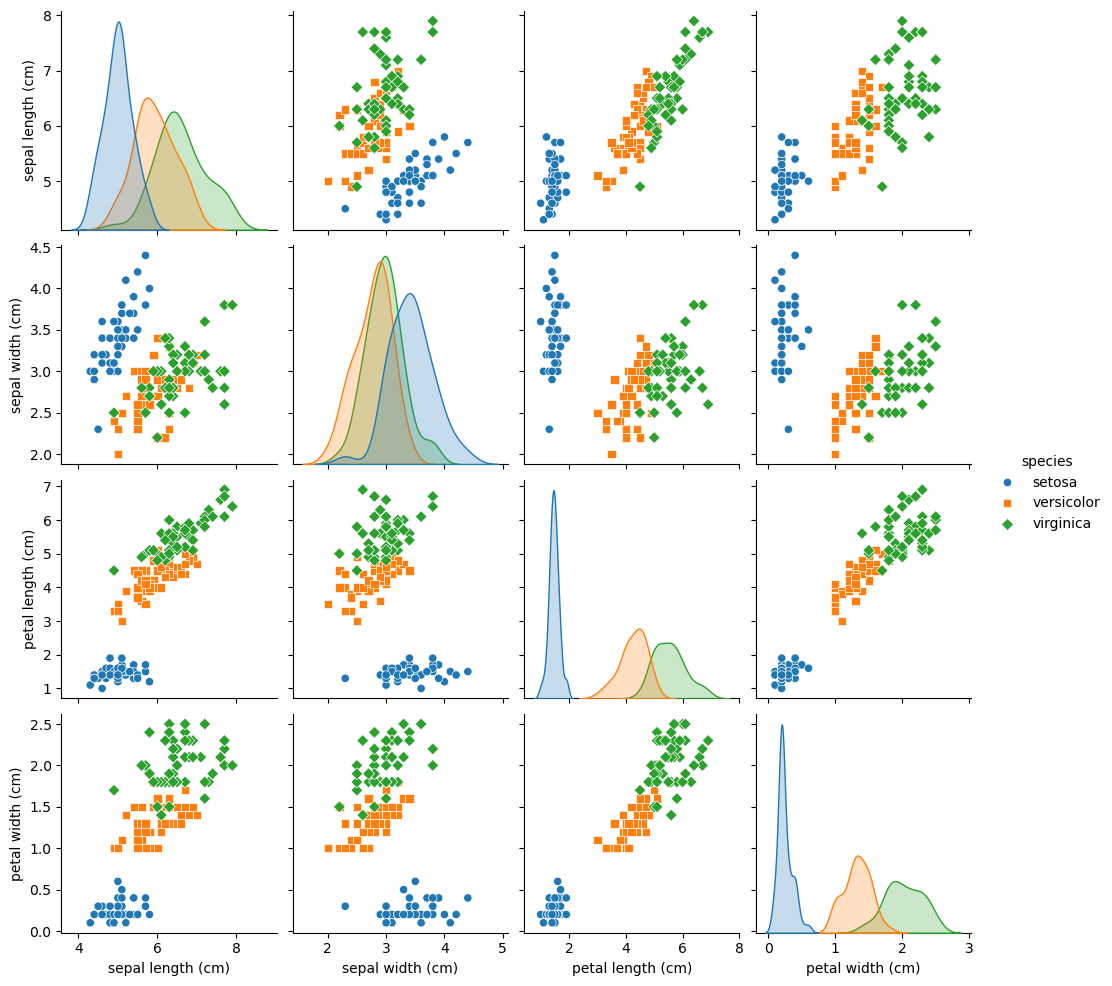

In [11]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()


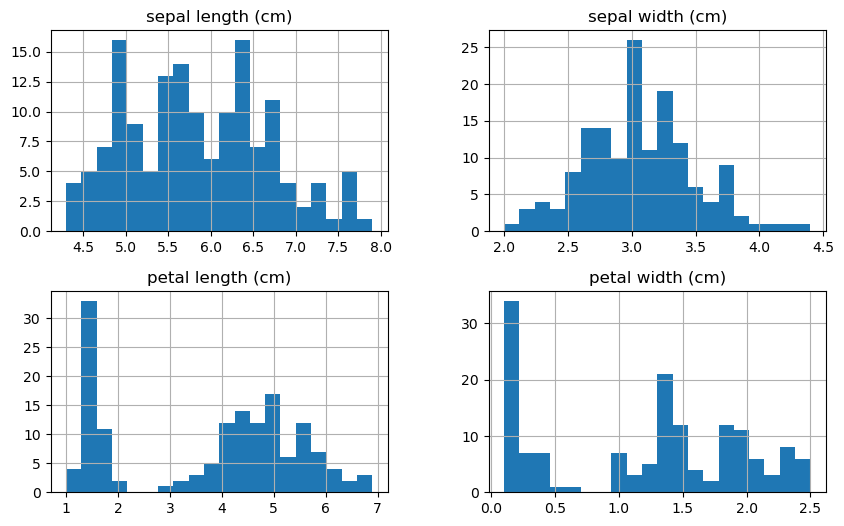

In [13]:
# Distribution of features
df.hist(figsize=(10, 6), bins=20)
plt.show()


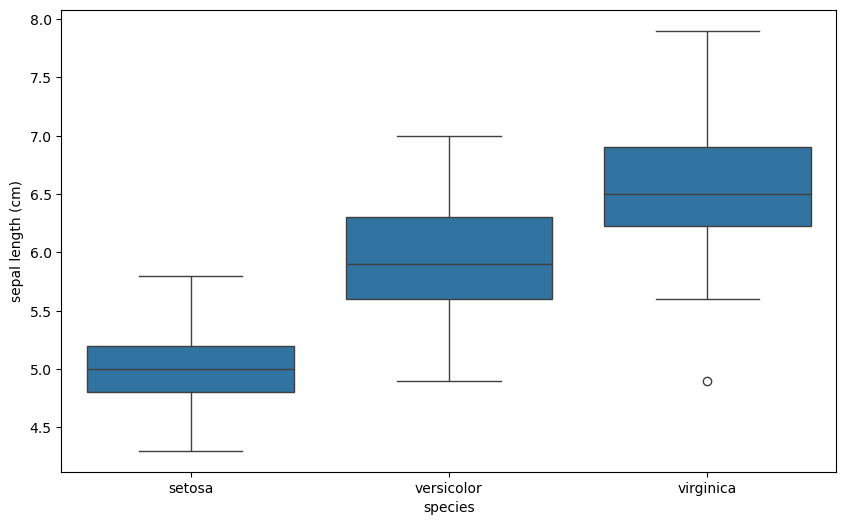

In [15]:
# Boxplot for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='sepal length (cm)')
plt.show()


In [17]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (120, 4) (120,)
Testing data shape: (30, 4) (30,)


In [19]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

print("Decision Tree model trained successfully!")


Decision Tree model trained successfully!


In [21]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


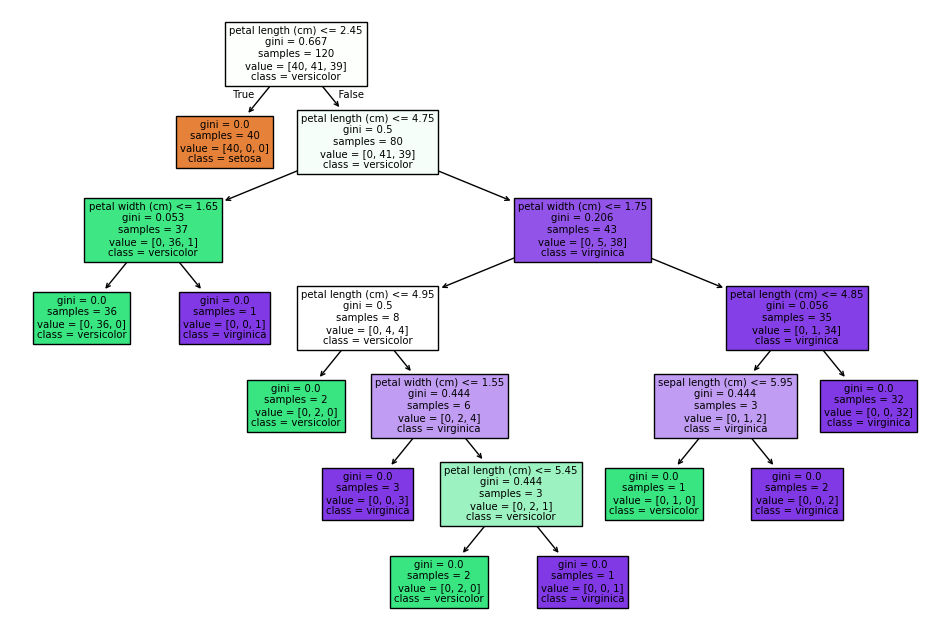

In [23]:
# Import necessary libraries for visualization
from sklearn.tree import plot_tree

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the decision tree
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()


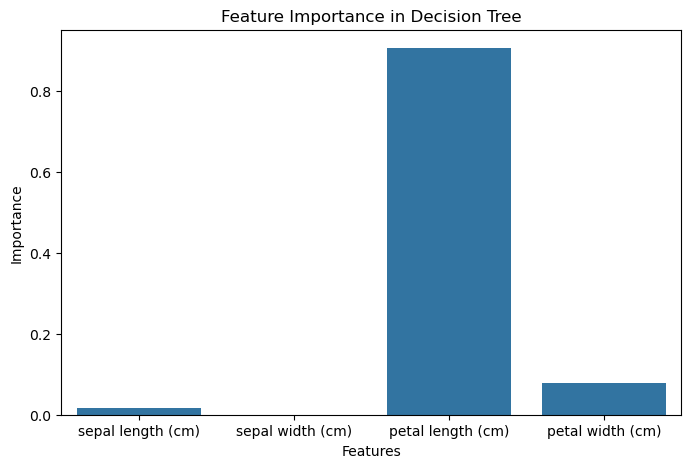

In [25]:
# Get feature importances
feature_importance = model.feature_importances_

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()
